In [ ]:
#Imports a utilizar
from tensorflow.keras import models #Crear/entrenar/evaluar el modelo
import tensorflow as tf
from tensorflow.keras.layers import Dense #Capas densas para la red
from tensorflow.keras.optimizers import Adam #Optimizador a utilizar
import numpy as np #Manejar los arreglos con los datos
import pandas as pd #Tomar el dataset y convertir datos categoricos
from sklearn.model_selection import train_test_split #Para separar train de test
import matplotlib.pyplot as plt #Para graficar

# Parte 1: Celsius a Fahrenheit

In [10]:
#Creo el modelo
model = models.Sequential()

#Añado la capa
model.add(Dense(1, input_dim=1))

#Compilo el modelo
model.compile(optimizer=Adam(learning_rate=0.1), loss="mse")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
#Los datos a usar
X = np.array([-40, 0, 15, 20, 25, 30, 55, 67, 12.5, 17.3])
Y = np.array([-40, 32, 59, 68, 77, 86, 131, 152.6, 54.5, 63.14])

#Separo los datos en training y testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [12]:
#Entreno la red
historial = model.fit(X_train,Y_train,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 294ms/step - loss: 4144.5850
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 3776.5342
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 3429.9175
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 3105.0618
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 2802.2212
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 2521.5552
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 2263.1255
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 2026.8835
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 1812.6573
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 1620.1431
Epoch 11/1000
1/1 [==============================] - 0s 3ms/step - loss: 1448.8953
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 1298.3193
Epoch 13/10

In [13]:
test_loss = model.evaluate(X_test, Y_test)
print(test_loss)

1/1 [==============================] - 0s 86ms/step - loss: 9.1963e-04
0.0009196293540298939


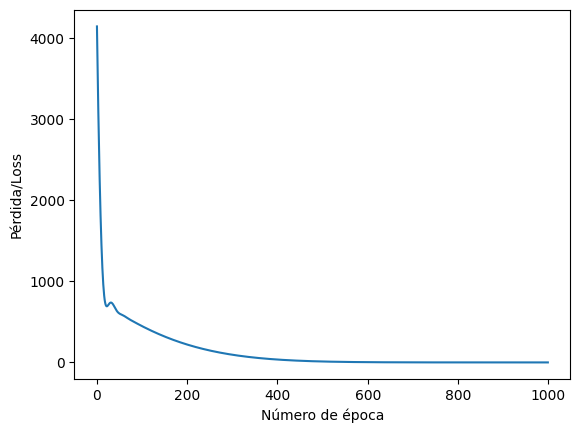

In [14]:
#Grafico el loss a lo largo de las epochs
plt.xlabel("Número de época")
plt.ylabel("Pérdida/Loss")
plt.plot(historial.history["loss"])

In [15]:
#Predicción de los primeros 3 elementos de entrenamiento
print("Datos a predecir:")
print(X_train[:3])
print("-----------------")
result = model.predict(X_train[:3])
print("Resultados obtenidos:")
print(result)
print("Valores correctos:")
print(Y_train[:3])

Datos a predecir:
[67. 30. 20.]
-----------------
1/1 [==============================] - 0s 53ms/step
Resultados obtenidos:
[[152.60152]
 [ 85.96361]
 [ 67.95337]]
Valores correctos:
[152.6  86.   68. ]


In [16]:
print(model.get_weights())

[array([[1.8010244]], dtype=float32), array([31.932878], dtype=float32)]


# Parte 2: Sueldos

In [17]:
!git clone https://github.com/gabyaleperez/redesNeuronales

/Users/matiasurbieta/.zshenv:5: permission denied: /Users/matiasurbieta
fatal: destination path 'redesNeuronales' already exists and is not an empty directory.


In [18]:
#Creo el modelo
model = models.Sequential()

#Añado de a una capa
model.add(Dense(500, input_dim=6, activation="relu", kernel_initializer="random_normal"))
model.add(Dense(200, activation="relu"))
model.add(Dense(1, activation="relu"))

In [19]:
#Compilo el modelo
model.compile(optimizer=Adam(learning_rate=0.1), loss="mse")

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 500)               3500      
                                                                 
 dense_2 (Dense)             (None, 200)               100200    
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 103901 (405.86 KB)
Trainable params: 103901 (405.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
#Cargo el dataset
data = pd.read_csv("redesNeuronales/datos_empleados_50000.csv")

#Pasa de 4 inputs a 6 -> Convierte Categoria en 3 entradas.
data = pd.get_dummies(data)

#Separo los datos de entrada X y los datos de salida Y
Y = np.array(data["sueldo"])
X = data.drop(["sueldo"], axis=1)
X = np.array(X.drop(data.columns[0], axis=1))

#Separo los datos en training y testing


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [22]:
#Entreno la red
X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)
historial = model.fit(X_train,Y_train,epochs=25,batch_size=40)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
test_loss = model.evaluate(X_test, Y_test)
print(test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 3351206656.0000
3351206656.0


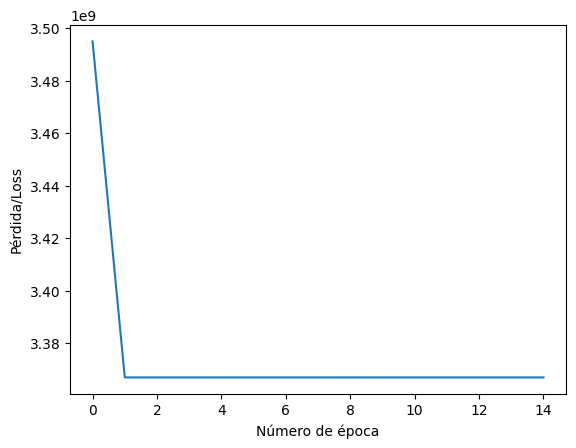

In [ ]:
#Grafico el loss a lo largo de las epochs
plt.xlabel("Número de época")
plt.ylabel("Pérdida/Loss")
plt.plot(historial.history["loss"])

In [ ]:
#Predicción de los primeros 3 elementos de entrenamiento
print("Datos a predecir:")
print(X_train[:3])
print("-----------------")
result = model.predict(X_train[:3])
print("Resultados obtenidos:")
print(result)
print("Valores correctos:")
print(Y_train[:3])

Datos a predecir:
[[36300     1     1     1     0     0]
 [16400     2     0     0     1     0]
 [40000     0     0     0     0     1]]
-----------------
1/1 [==============================] - 0s 77ms/step
Resultados obtenidos:
[[0.]
 [0.]
 [0.]]
Valores correctos:
[38350 18400 42570]
